# 타이타닉 데이터셋 분석하고 생존/사망 예측하기

---

#### 2022100870 손수민


## 0. Titanic 데이터셋 살펴보기

#### 데이터 다운로드
  https://www.kaggle.com/c/titanic (Titanic: Machine Learning from Disaster)

데이터 분석을 하기 위해 필요한 모듈들을 가져오고 미리 다운받아 둔 titanic 데이터셋을 불러온다.  
데이터셋을 불러올 때 이미 'PassengerId'라는 고유의 번호를 가지고 있으므로 index로 사용한다.  
데이터셋의 개요를 살펴본다.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
titanic = pd.read_csv("./titanic/train.csv")
titanic.set_index('PassengerId', inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [47]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


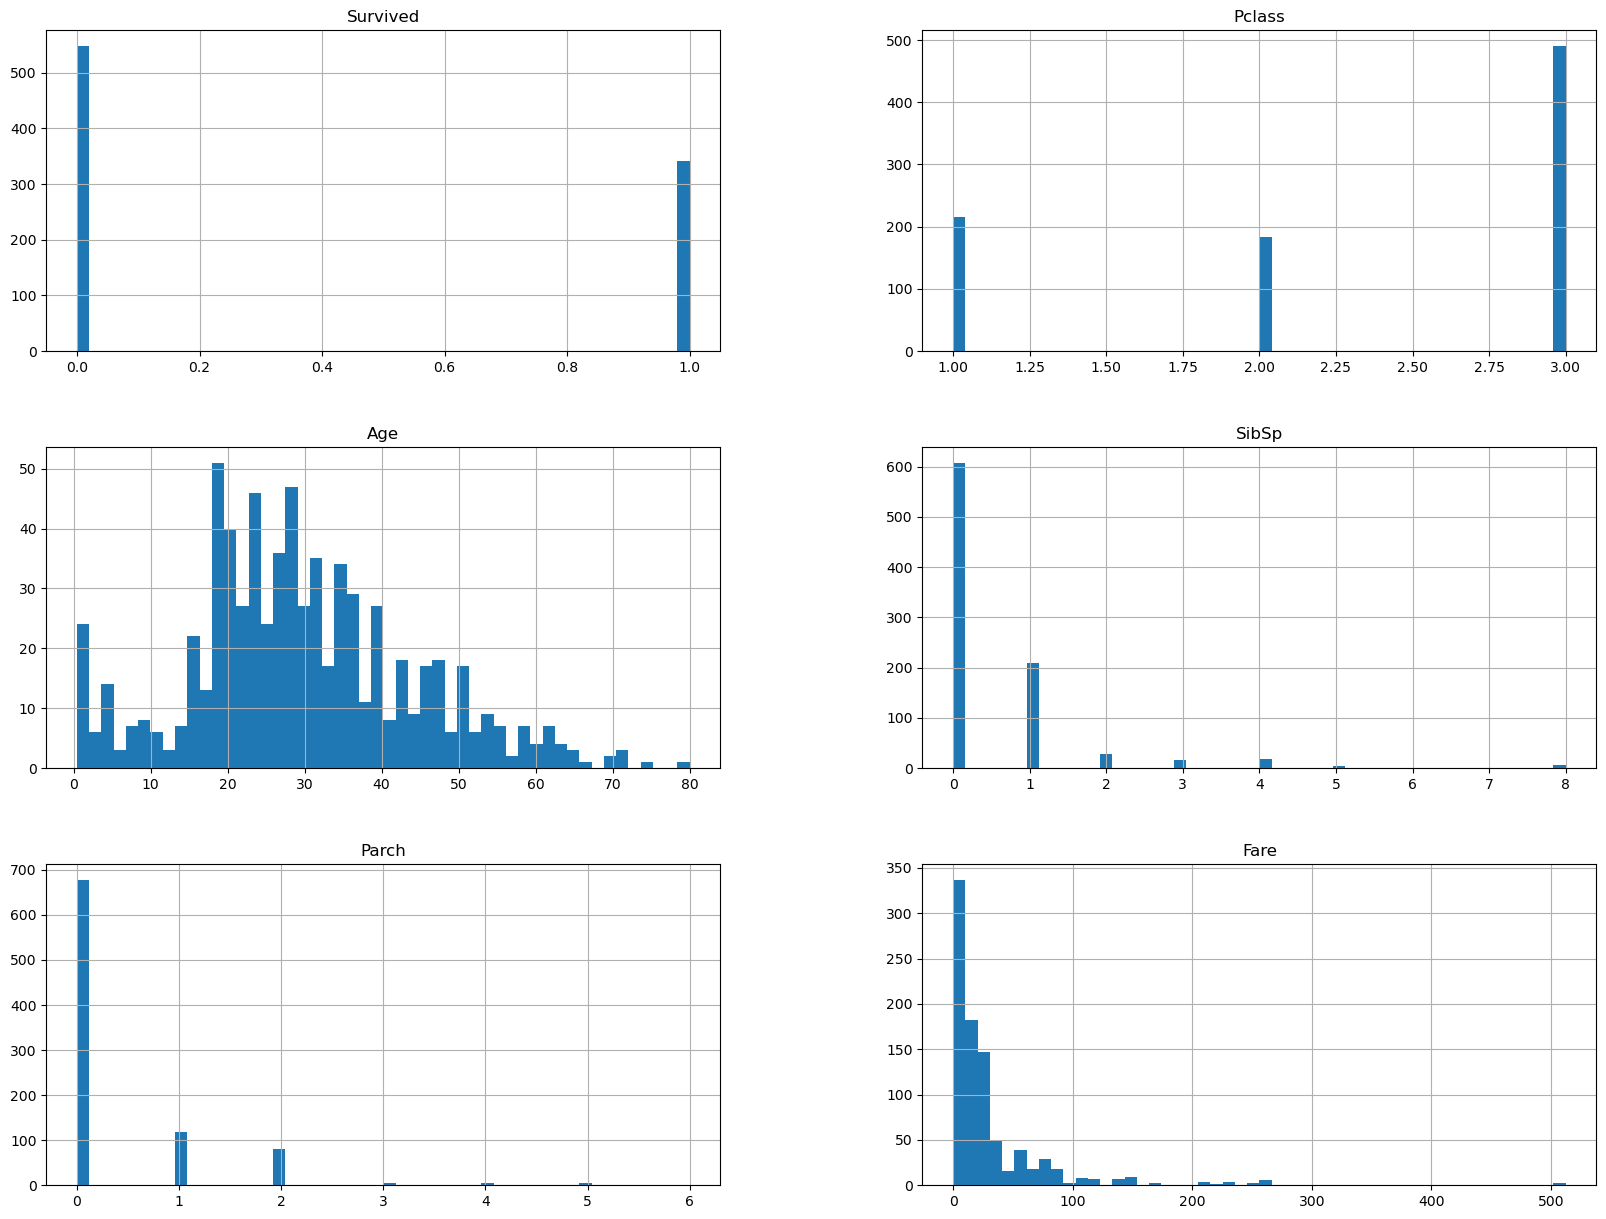

In [48]:
# 그래프를 통해 전체적인 분포 살피기

titanic.hist(bins=50, figsize=(20, 15))
plt.show()

In [49]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### 데이터 column
- survival: 생존여부( 생존:1, 생존x: 0)
- pclass: 티켓 등급(1등급:1. 2등급: 2, 3등급: 3)
- sex: 성별(male,female)
- age: 나이(float)
- sibsp: 타이타닉에 승선한 형제자매 또는 배우자의 수
- parch: 타이타닉에 승선한 부모-자식의 수
- ticket: 티켓 번호
- fare: 승선 요금
- cabin: 선실 번호
- emvarked: 승선 항구 이름( C: Cherbourg, Q: Queenstown, S: Southampton)

## 1. 데이터 분석

>  가설 
> 1. 성별이 생존율에 영향을 줄 것이다.
> 2. 티켓 등급이 생존율에 영향을 줄 것이다.
> 3. 나이가 생존율에 영향을 줄 것이다.
4. 부모-자식 관계 혹은 부모나 자식과 오지 않은 경우에 따라 생존율이 변화할 것이다.
5. 함께 온 가족 수가 생존율에 영향을 줄 것이다.
6. 선실 번호가 생존율에 영향을 줄 것이다.

### 1) 성별이 생존율에  영향을 줄 것이다.

예측: 그렇다.

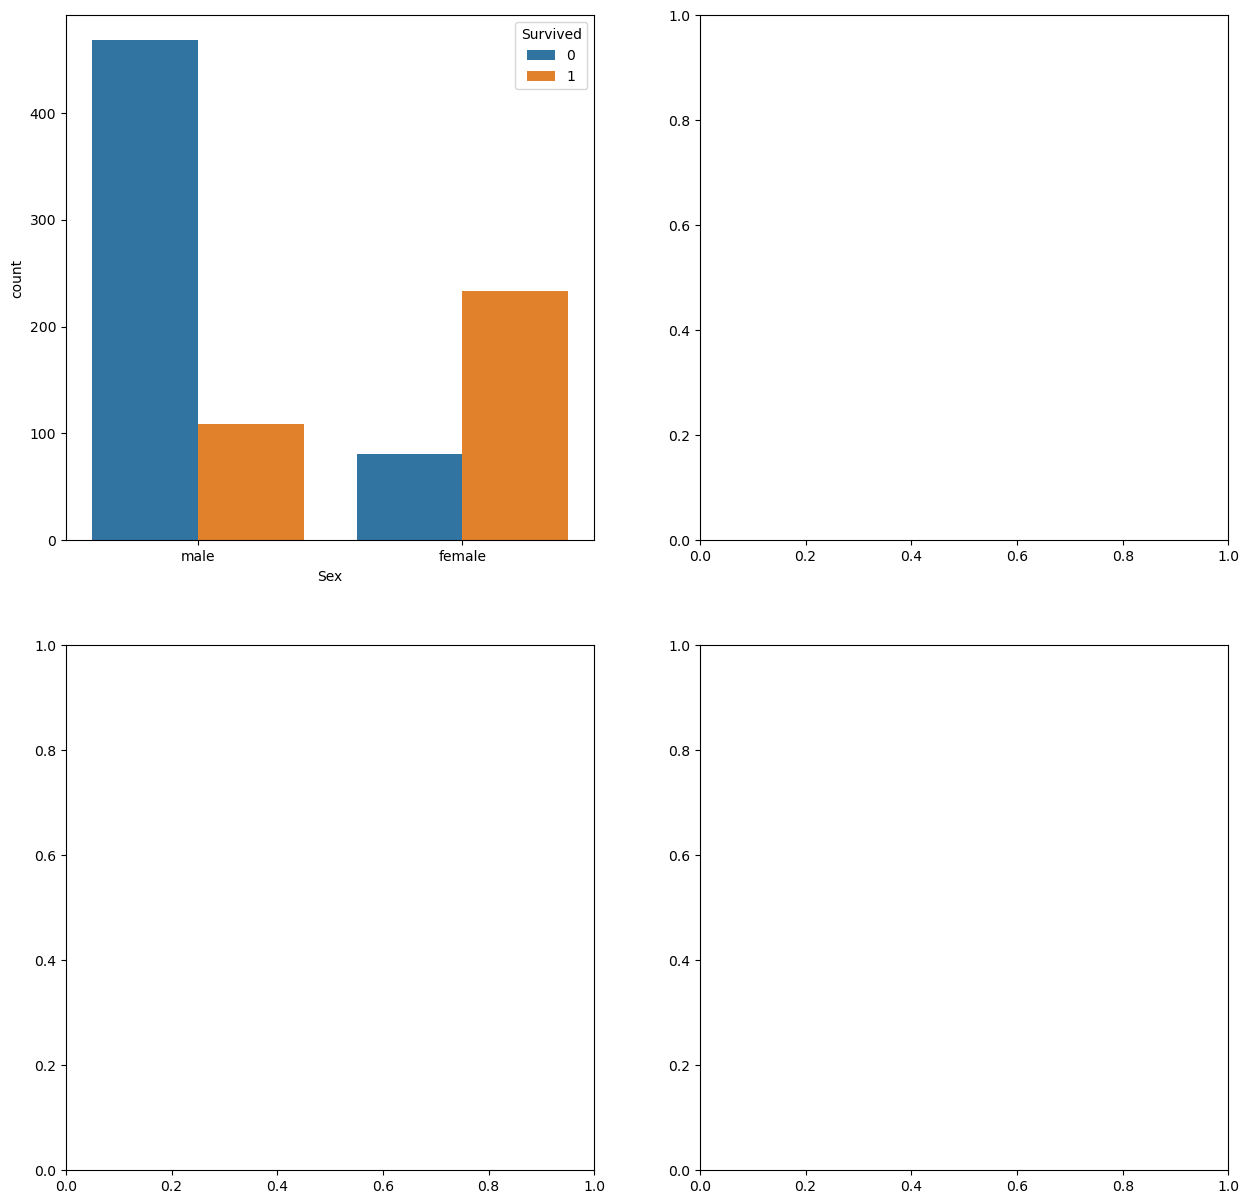

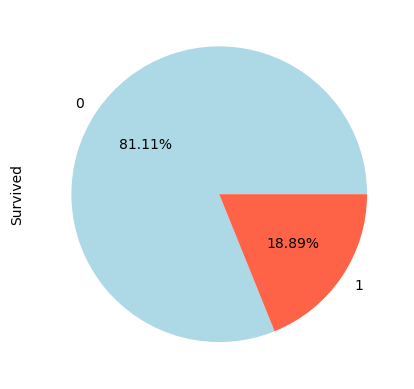

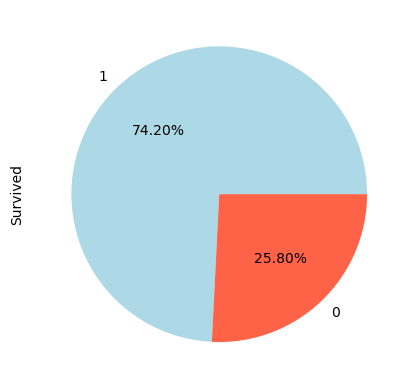

In [94]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(x=titanic["Sex"], hue=titanic["Survived"], ax=ax[0, 0])
plt.show()

titanic[titanic["Sex"]=="male"]['Survived'].value_counts().plot.pie(autopct = '%.2f%%', colors = ['lightblue', 'tomato'])
plt.show()

titanic[titanic["Sex"]=="female"]['Survived'].value_counts().plot.pie(autopct = '%.2f%%', colors = ['lightblue', 'tomato'])
plt.show()

### 2) 티켓 등급이 생존율에 영향을 줄 것이다.

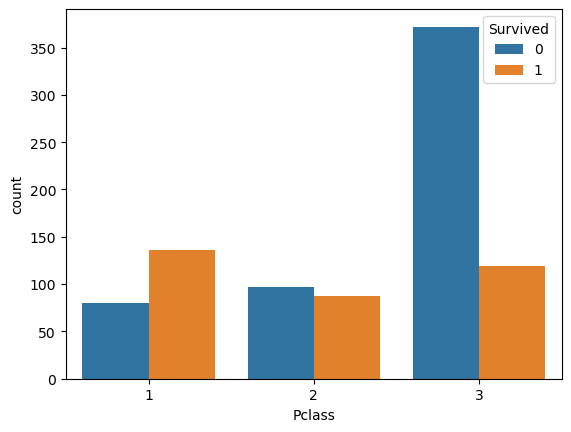

In [51]:
sns.countplot(x=titanic["Pclass"], hue=titanic["Survived"])
plt.show()

### 3) 나이가 생존율에 영향을 줄 것이다.

In [52]:
titanic.Age.isnull().sum()

177

In [53]:
bins = range(0, 91, 10)
bins_label = [i for i in bins]
titanic["age_group"] = pd.cut(titanic["Age"], bins, right=False, labels=bins_label[:-1])

In [54]:
titanic['Initial']=0
for i in titanic:
    titanic['Initial']=titanic.Name.str.extract('([A-Za-z]+)\.')

titanic['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

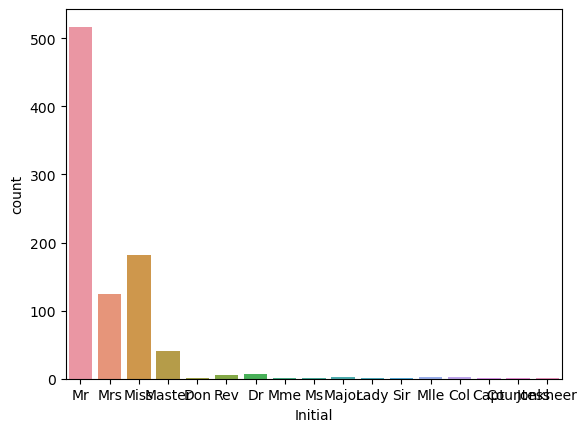

In [55]:
sns.countplot(x=titanic['Initial'])
plt.show()

In [56]:
pd.crosstab([titanic.Initial, titanic.Sex], titanic.age_group).T.style.background_gradient(cmap='summer_r')

In [57]:
titanic['Initial'].replace(['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Mr', 'Rev', 'Sir'], 'Mr', inplace=True)
titanic['Initial'].replace(['Countess', 'Lady', 'Mrs'], 'Mrs', inplace=True)
titanic['Initial'].replace(['Master'], 'Master', inplace=True)
titanic['Initial'].replace(['Miss', 'Mlle', 'Mme', 'Ms'], 'Miss', inplace=True)
titanic['Initial'].replace(['Dr'], 'Other', inplace=True)

titanic.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.891990
Mrs       35.981818
Other     42.000000
Name: Age, dtype: float64

In [58]:
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mr'),'Age']=33
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Mrs'),'Age']=36
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Master'),'Age']=5
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Miss'),'Age']=22
titanic.loc[(titanic.Age.isnull())&(titanic.Initial=='Other'),'Age']=42

<AxesSubplot:xlabel='Survived', ylabel='Age'>

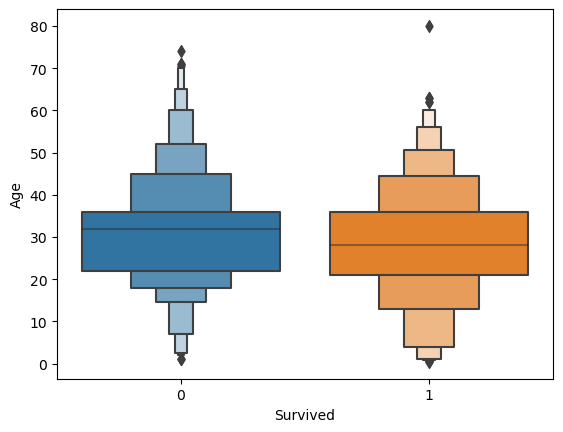

In [59]:
sns.boxenplot(y=titanic["Age"], x=titanic["Survived"])

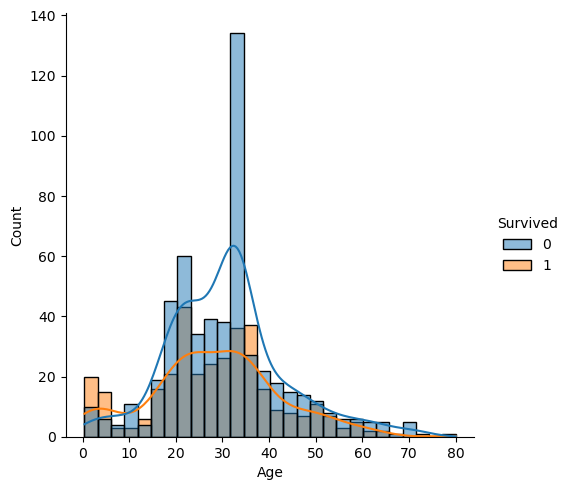

In [91]:
sns.displot(titanic, x='Age', hue="Survived", kde=True)
plt.show()

<AxesSubplot:xlabel='age_group'>

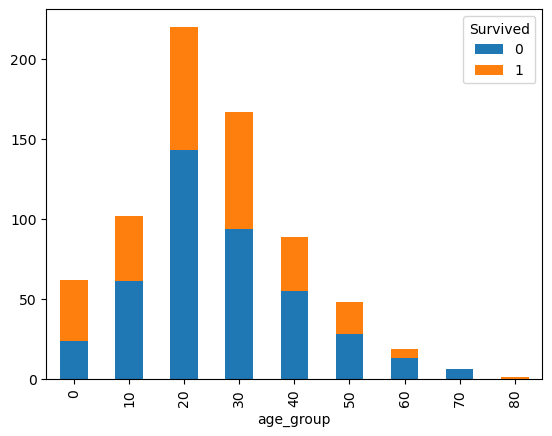

In [60]:
a = titanic.groupby("age_group")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

### 4) 부모-자식 관계 혹은 부모나 자식과 오지 않은 경우에 따라 생존율이 변화할 것이다.

In [62]:
titanic['family_member'] = 0

titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Mr'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Mrs'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Other'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Master'),'family_member'] = 'child'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Miss'),'family_member'] = 'child'
titanic.loc[(titanic.SibSp==0),'family_member'] = 'alone'
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,Initial,family_member
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20,Mr,parent
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30,Mrs,parent
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20,Miss,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30,Mrs,parent
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30,Mr,alone


In [63]:
titanic['family_member'].value_counts()

alone     608
parent    190
child      93
Name: family_member, dtype: int64

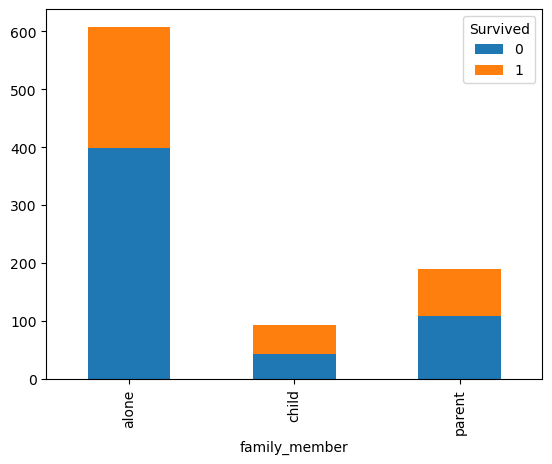

In [64]:
a = titanic.groupby("family_member")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

plt.show()

In [65]:
titanic['family_member'] = 0

titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Mr'),'family_member'] = 'father'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Mrs'),'family_member'] = 'mather'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Other'),'family_member'] = 'parent'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Master'),'family_member'] = 'son'
titanic.loc[(titanic.SibSp!=0)&(titanic.Initial=='Miss'),'family_member'] = 'daugther'
titanic.loc[(titanic.SibSp==0),'family_member'] = 'alone'
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,Initial,family_member
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20,Mr,father
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30,Mrs,mather
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20,Miss,alone
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30,Mrs,mather
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30,Mr,alone


In [66]:
titanic['family_member'].value_counts()

alone       608
father      107
mather       81
daugther     59
son          34
parent        2
Name: family_member, dtype: int64

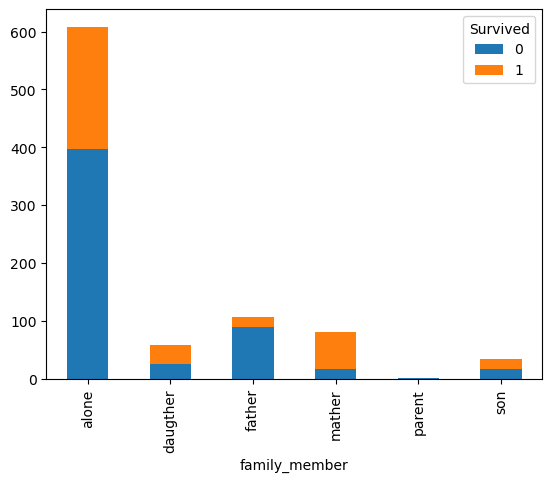

In [67]:
a = titanic.groupby("family_member")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

plt.show()

### 5) 함께 온 가족 수가 생존율에 영향을 줄 것이다.

<AxesSubplot:xlabel='family_size', ylabel='count'>

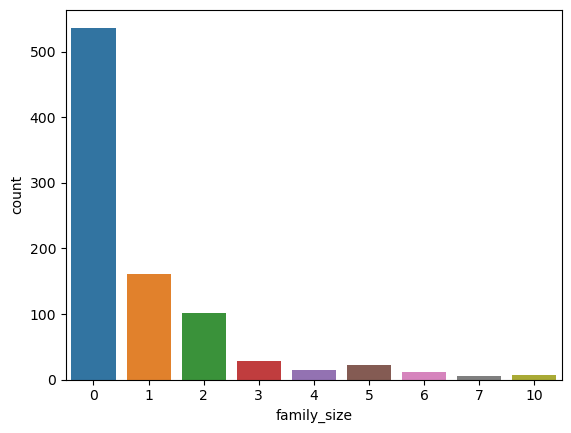

In [68]:
titanic["family_size"] = 0

titanic["family_size"] = titanic.Parch+titanic.SibSp
sns.countplot(x=titanic["family_size"])

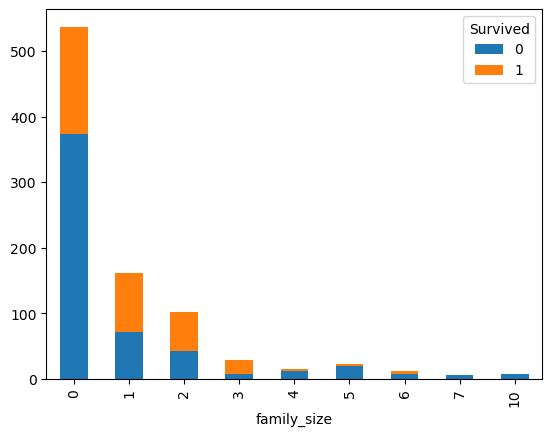

In [69]:
a = titanic.groupby("family_size")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

plt.show()

In [70]:
pd.crosstab(titanic.family_size,titanic.Survived).T.style.background_gradient(cmap='summer_r')

family_size,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### 6) 선실 번호가 생존율에 영향을 줄 것이다.

In [71]:
titanic['cabin_section']=0
for i in titanic:
    titanic['cabin_section']=titanic.Cabin.str.extract('([A-Za-z]+)')
titanic[["Pclass", "cabin_section"]].value_counts(sort=False)

Pclass  cabin_section
1       A                15
        B                47
        C                59
        D                29
        E                25
        T                 1
2       D                 4
        E                 4
        F                 8
3       E                 3
        F                 5
        G                 4
dtype: int64

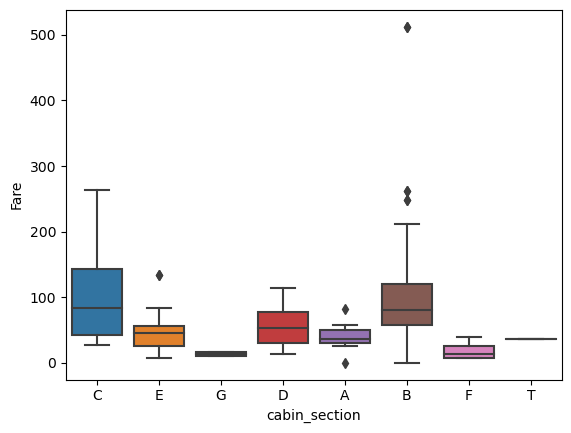

In [72]:
sns.boxplot(x="cabin_section", y="Fare", data=titanic)
plt.show()

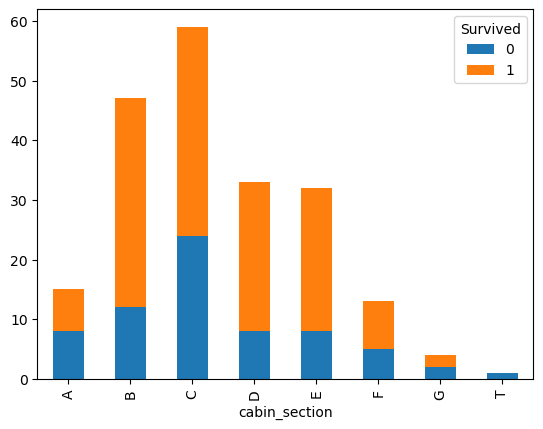

In [73]:
a = titanic.groupby("cabin_section")["Survived"].value_counts()
a.unstack().plot.bar(stacked=True)

plt.show()

## 예측하기

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit

<bound method LinearRegression.fit of LinearRegression()>

In [75]:
train = titanic
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Ticket         891 non-null    object  
 8   Fare           891 non-null    float64 
 9   Cabin          204 non-null    object  
 10  Embarked       889 non-null    object  
 11  age_group      714 non-null    category
 12  Initial        891 non-null    object  
 13  family_member  891 non-null    object  
 14  family_size    891 non-null    int64   
 15  cabin_section  204 non-null    object  
dtypes: category(1), float64(2), int64(5), object(8)
memory usage: 112.6+ KB


In [76]:
train = train.drop(['Name', 'Ticket', 'Cabin', 'age_group','Initial', 'family_member', 'family_size', 'cabin_section'], axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,22.0,1,2,23.4500,S


In [77]:
train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,S
888,1,1,1,19.0,0,0,30.0000,S
889,0,3,1,22.0,1,2,23.4500,S


In [79]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train[['Survived']]